# Interpolacja Hermite'a

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

## Węzyły czebyszewa

In [2]:
def chebyshev_nodes(a, b, n):
    return np.vectorize(lambda x : 0.5*(a+b) + .5*(b-a)*np.cos((2*x - 1)*np.pi/(2*n)))(np.arange(1, n+1))

## Równomierny rozkład

In [3]:
def  uniform_nodes(a, b, n):
    return np.linspace(a, b, n)

In [4]:
k=3
m=0.2

def f8(x):
    return np.sin(x*k/np.pi)*np.exp(-m*x/np.pi)


def get_nodes(function, n, nodes_func):
    x = nodes_func(-np.pi*np.pi, 2*np.pi*np.pi, n)
    y = np.vectorize(f8)(x)
    return x, y


def df(x):
    return (np.exp(-m*x/np.pi)*(k*np.cos(k*x/np.pi)-m*np.sin(k*x/np.pi)))/(np.pi)


## Ze wzoru Hermite'a

In [5]:
def interpolation_hermite(x, y, n):
    k = x.shape[0]
    f = np.zeros((2*k, 2*k))
    xtimes2 = np.zeros((2*k))
    xtimes2[::2] = x
    xtimes2[1::2] = x
    f[::2, 0] = y
    f[1::2, 0] = y
    
    f[1::2, 1] = df(xtimes2[1::2])

    f[2::2, 1] = (f[2::2, 0] - f[1:-1:2, 0]) / (xtimes2[2::2] - xtimes2[:-2:2])
    
    for i in range(2, 2*k):
        f[i:, i] = (f[i:, i-1] - f[i-1:-1, i-1]) / (xtimes2[i:] - xtimes2[:-i])
        
    a = np.diagonal(f)
    new_x = uniform_nodes(xtimes2[0], xtimes2[-1], n)
    new_y = np.full(new_x.shape[0], a[0])
    
    for i in range(1, xtimes2.shape[0]):
        new_y += a[i]*np.prod(np.tile(np.expand_dims(new_x, 1), i) - xtimes2[:i], axis=1)

    return new_x, new_y    

## Funkcja do analizy

<IPython.core.display.Javascript object>


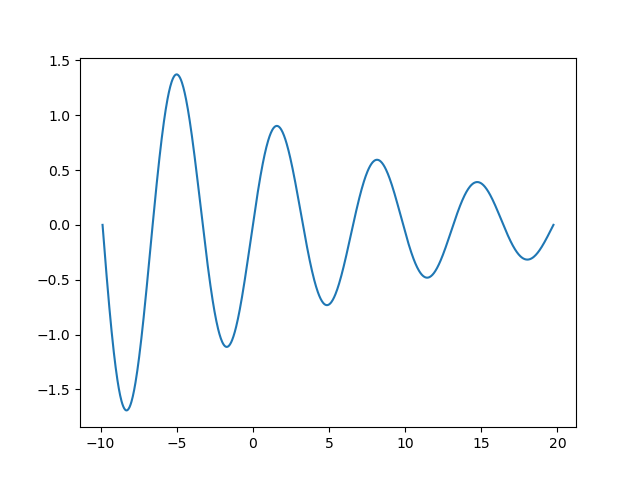

In [6]:
%matplotlib notebook
X, Y = get_nodes(f8, 1000, uniform_nodes)
plt.plot(X, Y)

## Testy

<IPython.core.display.Javascript object>


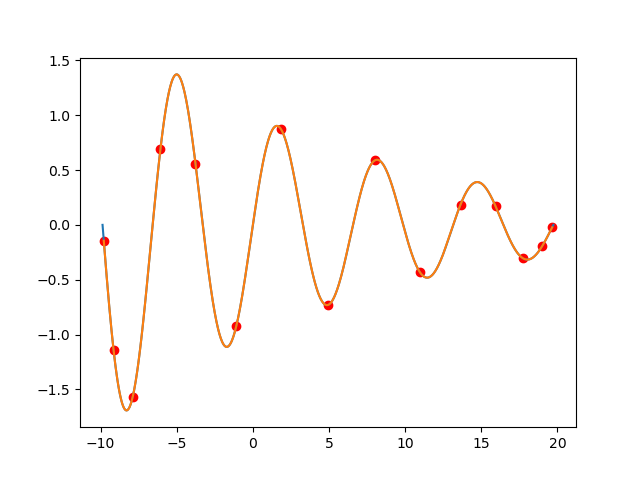

In [7]:
%matplotlib notebook
x, y = get_nodes(f8, 15, chebyshev_nodes)

nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)
plt.scatter(x, y, color='red')

## Dokładność interpolacji

In [36]:
def max_error(function, x, y):
    return np.max(np.abs(np.vectorize(function)(x) - y))

def var(function, x, y):
    return sum(np.square(np.vectorize(function)(x) - y))/(x.shape[0])

In [40]:
def tests(interpolation, nodes):
    table_1 = ["Var"]
    table_2 = ["Max error"]
    header = ["Nodes number"]
    for n in [3, 5, 6, 7, 8, 10, 15, 20, 30]:
        X, Y = get_nodes(f8, n, nodes)
        nx, ny = interpolation(X, Y, 1000)
        table_1.append(var(f8, nx, ny))
        table_2.append(max_error(f8, nx, ny))
        header.append(str(n))
    
    print(tabulate([table_1, table_2], headers=header))

In [41]:
tests(interpolation_hermite, chebyshev_nodes)

Nodes number           3       5         6         7          8          10           15           20           30
--------------  --------  ------  --------  --------  ---------  ----------  -----------  -----------  -----------
Var             0.725325  1.2307  0.991281  0.239803  0.0219227  1.9858e-05  2.12665e-16  2.00055e-17  2.53768e-12
Max error       1.99199   2.7083  2.56962   1.17732   0.338231   0.0106597   4.11206e-08  3.9006e-08   1.94277e-05


In [42]:
tests(interpolation_hermite, uniform_nodes)

Nodes number          3        5        6        7        8         10           15           20           30
--------------  -------  -------  -------  -------  -------  ---------  -----------  -----------  -----------
Var             3.08414  1.16729  4.18674  5.31492  1.68224  0.0165993  9.45034e-11  1.33067e-17  1.31859e-07
Max error       4.55796  2.49251  7.15576  9.46869  5.90472  0.676107   6.38415e-05  3.9915e-08   0.0027474


<IPython.core.display.Javascript object>


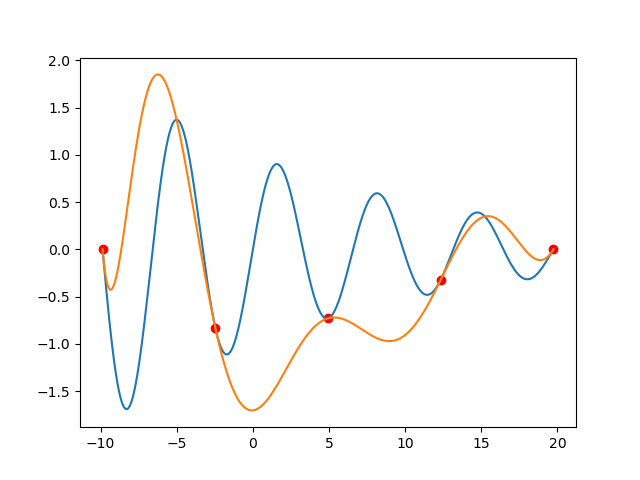

In [46]:
%matplotlib notebook
x, y = get_nodes(f8, 5, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


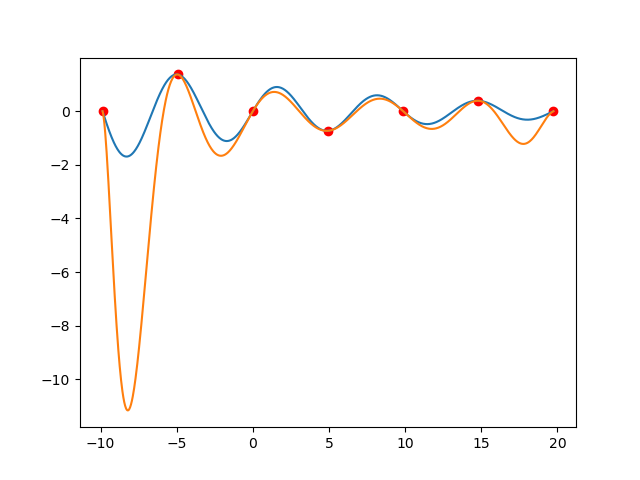

In [21]:
%matplotlib notebook
x, y = get_nodes(f8, 7, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


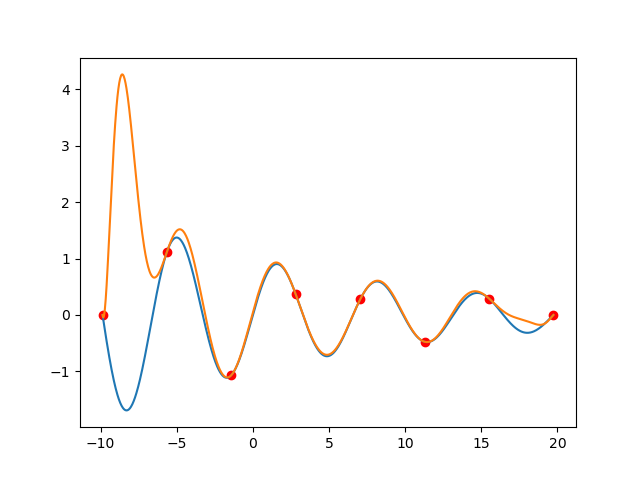

In [24]:
%matplotlib notebook
x, y = get_nodes(f8, 8, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


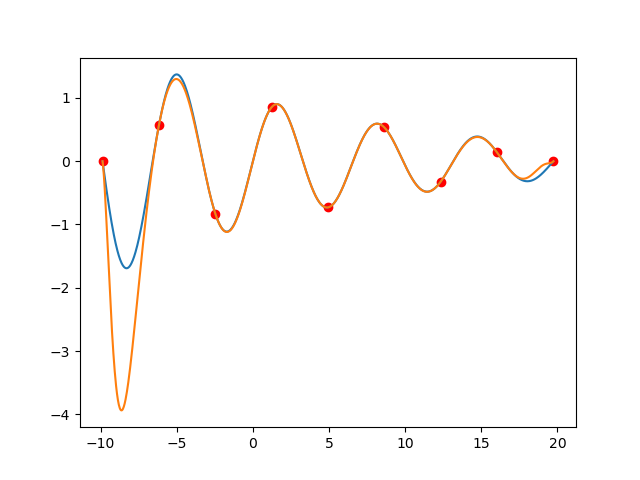

In [14]:
%matplotlib notebook
x, y = get_nodes(f8, 9, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


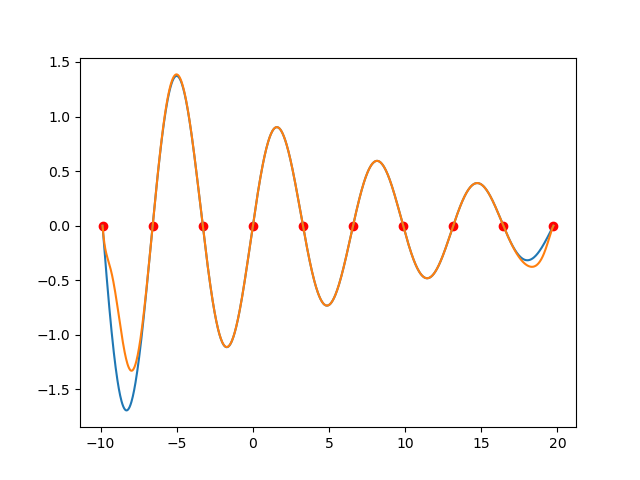

In [15]:
%matplotlib notebook
x, y = get_nodes(f8, 10, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


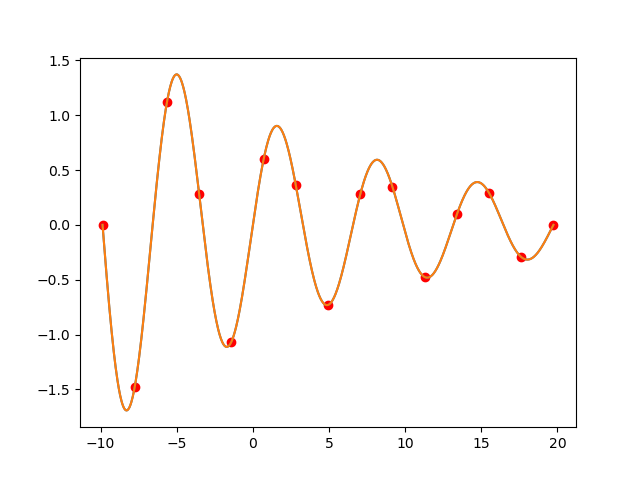

In [16]:
%matplotlib notebook
x, y = get_nodes(f8, 15, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


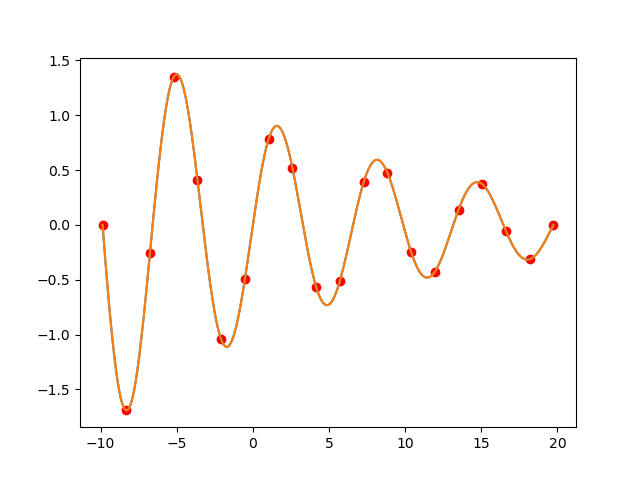

In [17]:
%matplotlib notebook
x, y = get_nodes(f8, 20, uniform_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


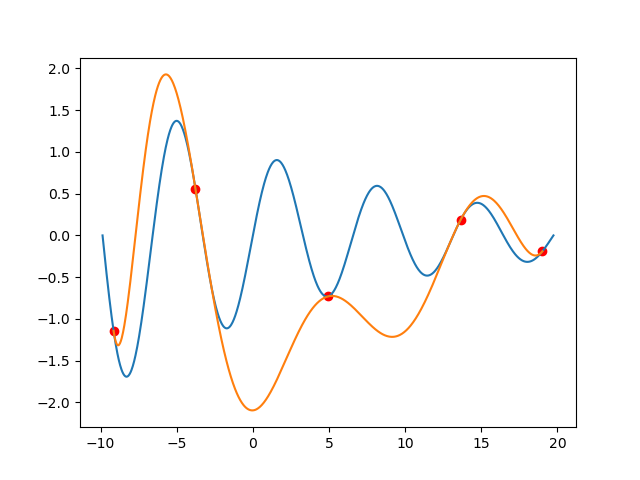

In [47]:
%matplotlib notebook
x, y = get_nodes(f8, 5, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


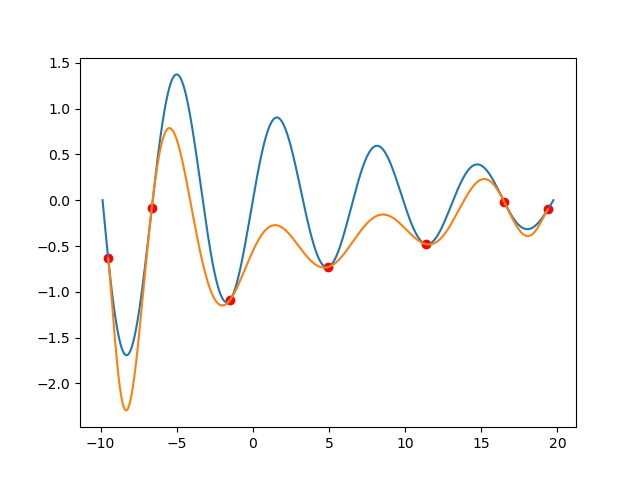

In [282]:
%matplotlib notebook
x, y = get_nodes(f8, 7, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


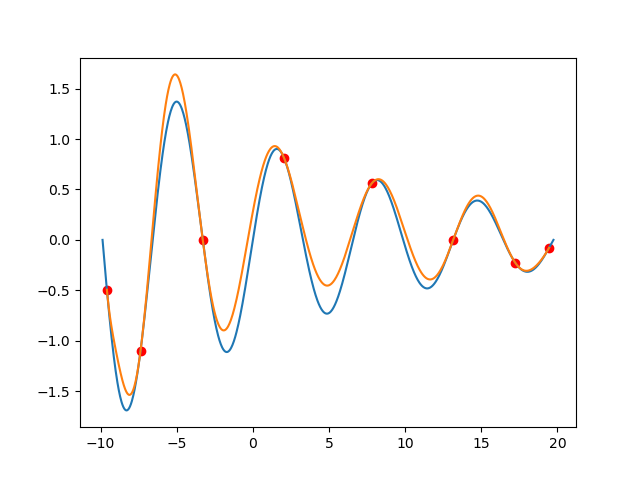

In [284]:
%matplotlib notebook
x, y = get_nodes(f8, 8, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


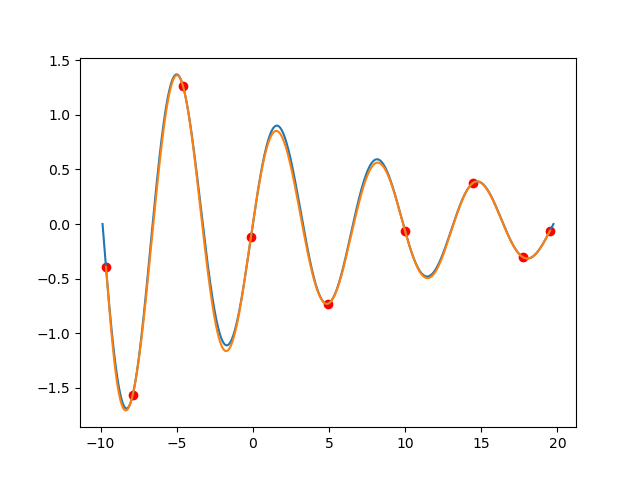

In [285]:
%matplotlib notebook
x, y = get_nodes(f8, 9, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


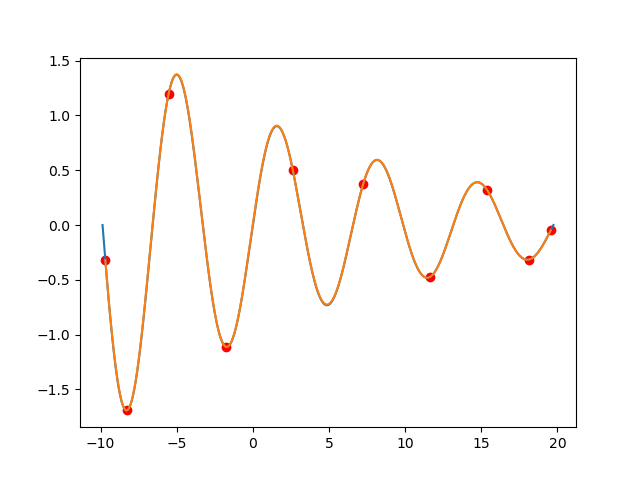

In [231]:
%matplotlib notebook
x, y = get_nodes(f8, 10, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


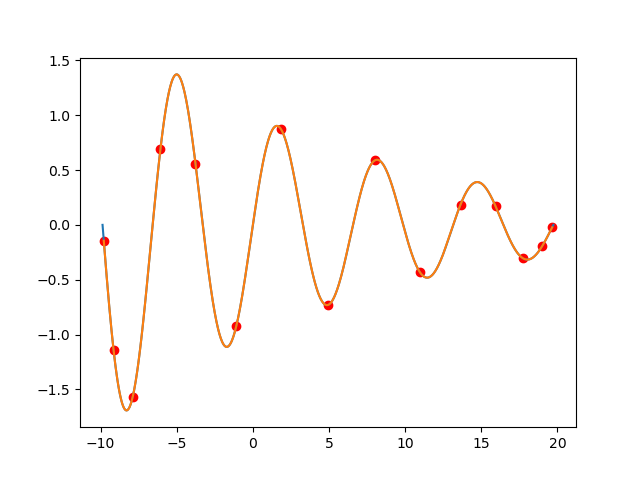

In [232]:
%matplotlib notebook
x, y = get_nodes(f8, 15, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)

<IPython.core.display.Javascript object>


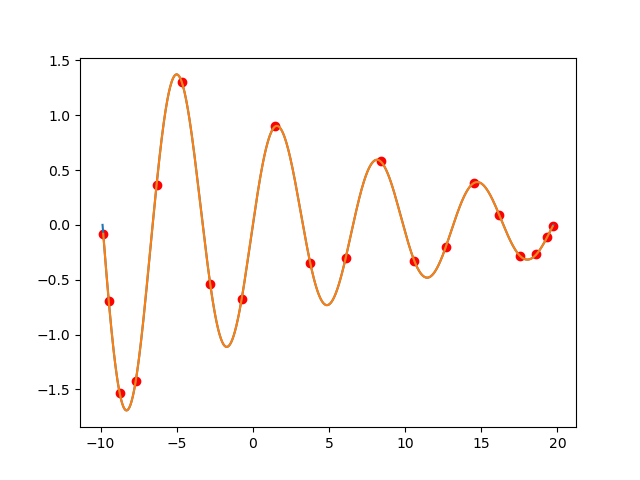

In [233]:
%matplotlib notebook
x, y = get_nodes(f8, 20, chebyshev_nodes)
plt.scatter(x, y, color='red')
nx, ny = interpolation_hermite(x, y, 1000)
plt.plot(X, Y)
plt.plot(nx, ny)